In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
DATASET = '../data/interim/so-questions-preproc.csv'

In [25]:
df = pd.read_csv(DATASET)
df_qs = df.copy()
df_qs = df_qs.drop(['Unnamed: 0'], axis =1)

In [27]:
df_qs.head(30)

creation_date   user_id  reputation  view_count  \
0   2022-02-05 10:36:08   6709058          81          13   
1   2022-02-05 05:45:33   7116458          11          19   
2   2022-02-04 20:05:21  16389467          15          14   
3   2022-02-04 09:36:00  10030258         138          13   
4   2022-02-04 08:47:59  13000747          15          17   
5   2022-02-04 08:28:00  14597864         161          34   
6   2022-02-04 08:13:57   1901348        1290          12   
7   2022-02-04 00:45:29  15173118          15          12   
8   2022-02-03 22:13:16   2194266           1          31   
9   2022-02-03 21:25:13   5489656          31           9   
10  2022-02-03 20:25:44    986003         315           5   
11  2022-02-03 19:07:36   1108350        1636          20   
12  2022-02-03 17:31:36  10768251           1          12   
13  2022-02-03 16:44:16   8518867          26          18   
14  2022-02-03 14:54:27  10046524         324          71   
15  2022-02-03 14:37:16  10876717          21          30   
16  2022-02-03 14:05:56   9731202          91          30   
17  2022-02-03 13:43:08  11060431          11          23   
18  2022-02-03 11:05:38   8180615         419          32   
19  2022-02-03 11:01:09   9536103         614          24   
20  2022-02-03 10:53:01  17603520          19          11   
21  2022-02-03 09:48:16   8219832         478          15   
22  2022-02-03 09:25:01  15254436          51          29   
23  2022-02-03 08:21:31   4955448           9          17   
24  2022-02-03 08:13:31  18054553          11          16   
25  2022-02-03 06:48:10  13519287          23          23   
26  2022-02-03 06:16:35  12157105          11          26   
27  2022-02-03 04:33:16   8096208         210          18   
28  2022-02-02 22:34:47  17974740          11          27   
29  2022-02-02 21:38:43   6093604        3520          33   

                                                title  \
0   Is there a way to allow non-root pods to write...   
1   how to create Snapshot &amp; Release Folder fo...   
2                  mocha: command not found in GitLab   
3   Cleaning up project directory and file based v...   
4   remote: The project you were looking for could...   
5               Caching Rust/Wasm tools in Gitlab CI?   
6   Is it a good idea to add .pytest_cache to ci r...   
7   Gitlab API not being able to view project vari...   
8   GitLab pipeline rules:exists with more than 10...   
9   Is there a way to make Cypress-Firefox testing...   
10  How to deploy Tensorflow TFX pipeline with Git...   
11  What is wrong with my JupyterHub config file ?...   
12                Protractor to webdriverio migration   
13              Gitlab CI for Spring Boot Maven stuck   
14        GitLab CI pull docker from private registry   
15    GitLab API - How to list all files in subfolder   
16  How to avoid installing all centos packages ev...   
17   Assigning predefined variable to global variable   
18  Python on Gitlab has ModuleNotFound, But Not W...   
19  Getting the current branch name when running c...   
20  Database migration issue in gitlab after upgra...   
21  Running Flutter Web integration tests inside g...   
22                                   Git push failure   
23  Failed to connect to repository Error while Bu...   
24      How can I read json file from Gitlab API url?   
25  Failure in CICD Pipeline when trying to push o...   
26  Cypress run on Gitlab CI/CD always failed but ...   
27      Get the issues mentioned in the merge request   
28  Opening python file in different directory in ...   
29  Docker-Compose - Import private repositories i...   

                                                 body  \
0   im trying to deploy gitlab to onpremises k8s c...   
1   i want to create snapshot amp release folder i...   
2   i want to try cicd so i am working on a simple...   
3   i started learning gitlabci using a course on ...   
4   im getting this error while trying to deploy m...   
5   im w

In [4]:
### Using TF-IDF to find the most representative trigrams in the corpus

In [37]:
stop_words = ['amp', '39', '01', '00', '0001', '10000']
vectorizer = TfidfVectorizer(ngram_range=(4,4), stop_words=stop_words)
titles_tfidf = vectorizer.fit_transform(df_qs['title_prc'])
features = (vectorizer.get_feature_names_out())
titles_tfidf = titles_tfidf.toarray()

# Getting top ranking features
sums = titles_tfidf.sum(axis = 0) # summing up the whole corpus

# gets a vector with the value of each tri gram along all the documents 

data = []
for col, term in enumerate(features):
    data.append((term, sums[col]))
ranking = pd.DataFrame(data, columns = ['n-gram', 'rank'])
words = ranking.sort_values('rank', ascending = False).reset_index(drop=True)
print ("\n\nTop n-grams : \n", words.head(10))



Top n-grams : 
                                        n-gram      rank
0                         file gitlab api url  1.154701
1                       read json file gitlab  1.154701
2                        json file gitlab api  1.154701
3                  run gitlab pipeline commit  1.000000
4                   mocha command find gitlab  1.000000
5                 trace gitlab pipeline event  1.000000
6                      gitlab ci variable job  1.000000
7                git remote add clarification  1.000000
8  fatal authentication fail 39httpsgitlabcom  1.000000
9                 issue mention merge request  1.000000


In [38]:
words.head()

n-gram      rank
0         file gitlab api url  1.154701
1       read json file gitlab  1.154701
2        json file gitlab api  1.154701
3  run gitlab pipeline commit  1.000000
4   mocha command find gitlab  1.000000

In [19]:
df_tfidf = pd.DataFrame(titles_tfidf, columns=features)
df_tfidf.tail()

39bundle39 recognize cmdlet function  39no nsa protect information  \
95                                   0.0                      0.000000   
96                                   0.0                      0.000000   
97                                   0.0                      0.447214   
98                                   0.0                      0.000000   
99                                   0.0                      0.000000   

    able view project variable  access nginx service script  \
95                         0.0                          0.0   
96                         0.0                          0.0   
97                         0.0                          0.0   
98                         0.0                          0.0   
99                         0.0                          0.0   

    add getignore bin obj  add pytestcache ci runner39s  \
95                    0.0                           0.0   
96                    0.0                           0.0   
97                    0.0                           0.0   
98                    0.0                           0.0   
99                    0.0                           0.0   

    allow nonroot pod write  allow push code project  \
95                      0.0                      0.0   
96                      0.0                      0.0   
97                      0.0                      0.0   
98                      0.0                      0.0   
99                      0.0                      0.0   

    amp release folder artifactory  ansible playbook working gitlab  ...  \
95                             0.0                              0.0  ...   
96                             0.0                              0.0  ...   
97                             0.0                              0.0  ...   
98                             0.0                              0.0  ...   
99                             0.0                              0.0  ...   

    way allow nonroot pod  way cypressfirefox test performant  \
95                    0.0                                 0.0   
96                    0.0                                 0.0   
97                    0.0                                 0.0   
98                    0.0                                 0.0   
99                    0.0                                 0.0   

    way deploy helm chart  way dynamically choose job  \
95                    0.0                         0.0   
96                    0.0                         0.0   
97                    0.0                         0.0   
98                    0.0                         0.0   
99                    0.0                         0.0   

    web integration test inside  work properly local run  \
95                          0.0                      0.0   
96                          0.0                      0.0   
97                          0.0                      0.0   
98                          0.0                      0.0   
99                          0.0                      0.0   

    work spring cloud datum  write cicd build ionic  \
95                      0.0                     0.0   
96                      0.0                     0.0   
97                      0.0                     0.0   
98                      0.0                     0.0   
99                      0.0                     0.0   

    wrong jupyterhub config file  yml list gitlab39 cli  
95                           0.0                    0.0  
96                           0.0                    0.0  
97                           0.0                    0.0  
98                           0.0                    0.0  
99                           0.0                    0.0  

[5 rows x 339 columns]

In [20]:
print(len(words))

339


In [8]:
wc_txt = " ".join(title for title in words.trigram.astype(str))
stop_words = ['gitlab', 'how', 'to', 'the']

In [9]:
word_cloud = WordCloud(stopwords=stop_words, background_color='white', min_word_length=3, max_words=500, width=3000, height=2000)
word_cloud.generate_from_text(wc_txt)

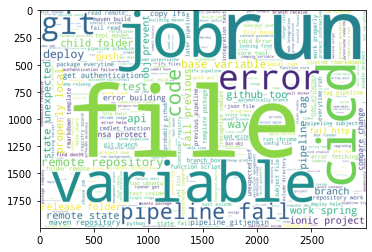

In [10]:
image = plt.gcf()
plt.imshow(word_cloud)
plt.show()
image.savefig('word_cloud.png')

In [11]:
print(len(features))

588
